In [1]:
# run this if tslearn isn't installed
!pip install tslearn

In [2]:
%matplotlib inline
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


In [3]:
# file name = binned_SFHs-7levels-JWST_z_0.5-1.0
file = "data/binned_SFHs-7levels-JWST_z_0.5-1.0.txt"
df = pd.read_csv(file,sep='\t')
df
levels=df.columns[2:8]
SFH_lev=df[levels].values

Euclidean k-means
3.819 --> 2.876 --> 2.804 --> 2.715 --> 2.621 --> 2.569 --> 2.549 --> 2.540 --> 2.535 --> 2.533 --> 2.531 --> 2.530 --> 2.529 --> 2.528 --> 2.528 --> 2.528 --> 2.527 --> 2.527 --> 2.527 --> 2.527 --> 2.527 --> 2.527 --> 2.527 --> 2.527 --> 2.527 --> 2.527 --> 2.527 --> 2.527 --> 


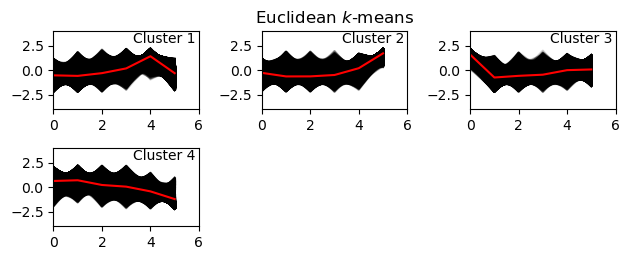

In [4]:
import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler

seed = 0
numpy.random.seed(seed)
X_train = SFH_lev
#X_train = X_train[y_train < 4]  # Keep first 3 classes
numpy.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
# Make time series shorter
sz = X_train.shape[1]

# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=4, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure()
for yi in range(4):
    plt.subplot(4, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

plt.tight_layout()
plt.show()

(array([17980.,     0.,     0., 34161.,     0.,     0., 20660.,     0.,
            0., 18569.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

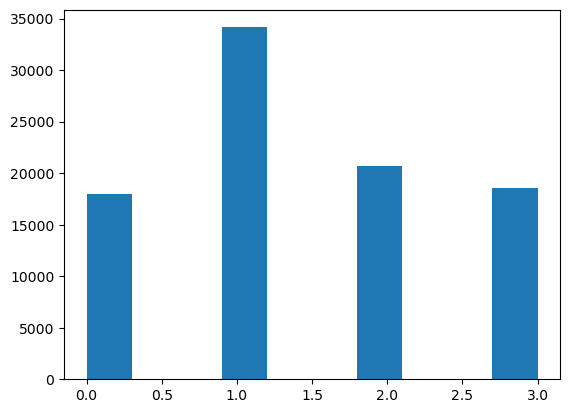

In [5]:
y_pred
plt.hist(y_pred)

DBSCAN


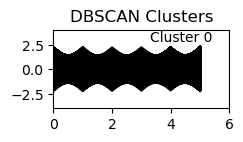

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

from tslearn.preprocessing import TimeSeriesScalerMeanVariance

seed = 0
np.random.seed(seed)

X_train = SFH_lev
# X_train = X_train[y_train < 4]  # Keep first 3 classes
np.random.shuffle(X_train)

# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)

# Reshape the data to 2D
n_samples, sz, d = X_train.shape
X_train_2d = X_train.reshape((n_samples, sz * d))

# DBSCAN
print("DBSCAN")
dbscan = DBSCAN(eps=0.5, min_samples= 5)
y_pred = dbscan.fit_predict(X_train_2d)

plt.figure()
for yi in range(-1, np.max(y_pred)+1):
    plt.subplot(4, 3, yi + 2)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85, 'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == -1:
        plt.title("DBSCAN Clusters")

plt.tight_layout()
plt.show()


(array([    0.,     0.,     0.,     0.,     0., 91370.,     0.,     0.,
            0.,     0.]),
 array([-1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7, -0.6, -0.5]),
 <BarContainer object of 10 artists>)

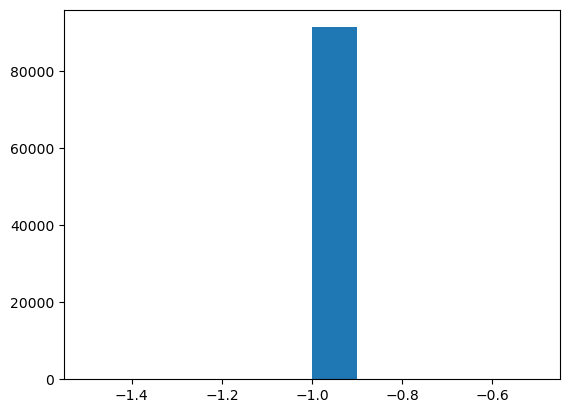

In [25]:
y_pred
plt.hist(y_pred)

Euclidean k-means


C:\Users\Maxime\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


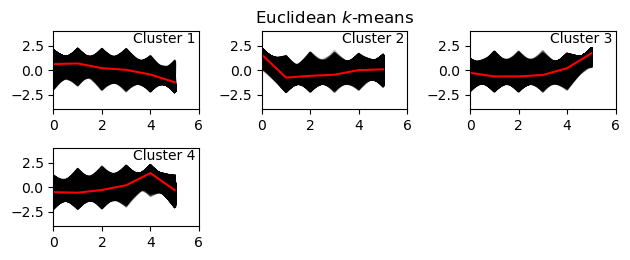

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from tslearn.preprocessing import TimeSeriesScalerMeanVariance

seed = 0
np.random.seed(seed)

X_train = SFH_lev
# X_train = X_train[y_train < 4]  # Keep first 3 classes
np.random.shuffle(X_train)

# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)

# Reshape the data to 2D
n_samples, sz, d = X_train.shape
X_train_2d = X_train.reshape((n_samples, sz * d))

# Euclidean k-means
print("Euclidean k-means")
km = KMeans(n_clusters=4, random_state=seed)
y_pred = km.fit_predict(X_train_2d)

# Reshape cluster centers back to 3D
cluster_centers_3d = km.cluster_centers_.reshape((4, sz, d))

plt.figure()
for yi in range(4):
    plt.subplot(4, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(cluster_centers_3d[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85, 'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

plt.tight_layout()
plt.show()
